# Exploratory Data Analysis for Email Marketing Campaign

### Import necessary packages and modules

In [1]:
import pandas as pd

In [2]:
!pip install matplotlib
import matplotlib.pyplot as plt

### Import all data

In [3]:
# userbase
udf = pd.read_csv('./data/userbase.csv', low_memory=False)
udf.head()

,Customer_ID,Gender,Type,Email_Address,Age,Tenure
0,1,M,C,Mph@msn.com,38,12
1,2,F,B,SophcYN7381qMe8lRqK@aol.com,37,23
2,3,F,C,xE@msn.com,32,15
3,4,M,C,WduR0o0@comcast.net,31,24
4,5,M,C,walHI9cmWJIBKvy0@aol.com,35,13


In [4]:
# sent emails
sdf = pd.read_csv('./data/sent_emails.csv', low_memory=False)
sdf.head()

,Sent_Date,Customer_ID,SubjectLine_ID
0,2016-01-28,1413,2
1,2016-03-02,83889,2
2,2016-03-09,457832,3
3,2016-01-20,127772,1
4,2016-02-03,192123,3


In [5]:
# responded
rdf = pd.read_csv('./data/responded.csv', low_memory=False)
rdf.head()

,Responded_Date,Customer_ID,SubjectLine_ID
0,2016-01-25,217102,3
1,2016-03-26,366875,2
2,2016-03-17,201561,2
3,2016-01-11,395345,3
4,2016-01-11,427539,3


## User Base Data

In [6]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Customer_ID    500000 non-null  int64 
 1   Gender         500000 non-null  object
 2   Type           500000 non-null  object
 3   Email_Address  500000 non-null  object
 4   Age            500000 non-null  int64 
 5   Tenure         500000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


Thankfully, there are no null or missing values in this dataset!

In [20]:
udf.describe()

,Customer_ID,Age,Tenure
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,31.618982,16.192818
std,144337.711635,6.707925,6.467513
min,1.000000,18.000000,0.000000
25%,125000.750000,27.000000,11.000000
50%,250000.500000,31.000000,14.000000
75%,375000.250000,36.000000,22.000000
max,500000.000000,63.000000,38.000000


### Unique Customers

In [8]:
print(udf.Customer_ID.nunique())

500000


In [15]:
print(udf.Email_Address.nunique())

464155


We have the user information for 500,000 customers, including their gender (M or F), type (business or consumer), age, and tenure (total time they've been a customer). These user attributes will help me define my "States".

There are no duplicate Customer IDs, but there are duplicate email addresses. This might pose a problem if the email address is used as a variable to define 'States'.

In [16]:
duplicate_emails = udf.groupby('Email_Address')['Customer_ID'].apply(lambda x: list(x.unique())).reset_index()
duplicate_emails = duplicate_emails[duplicate_emails['Customer_ID'].apply(len) > 1]

print("Customer IDs with the same email addresses:")
print(duplicate_emails)

Customer IDs with the same email addresses:
         Email_Address                                    Customer_ID
21        00@gmail.com                               [106390, 249481]
138     01@hotmail.com                               [140397, 143759]
139       01@yahoo.com                               [129005, 311009]
388       03@gmail.com                                [77797, 352878]
507       04@gmail.com  [30263, 36026, 73239, 163874, 312146, 425846]
...                ...                                            ...
463800    zx@gmail.com                               [195064, 355519]
463926    zy@gmail.com                [65917, 128266, 285654, 474902]
463927  zy@hotmail.com                                [50498, 192590]
463928    zy@yahoo.com                               [125258, 314080]
464054    zz@yahoo.com                               [153721, 353648]

[7343 rows x 2 columns]


### Gender

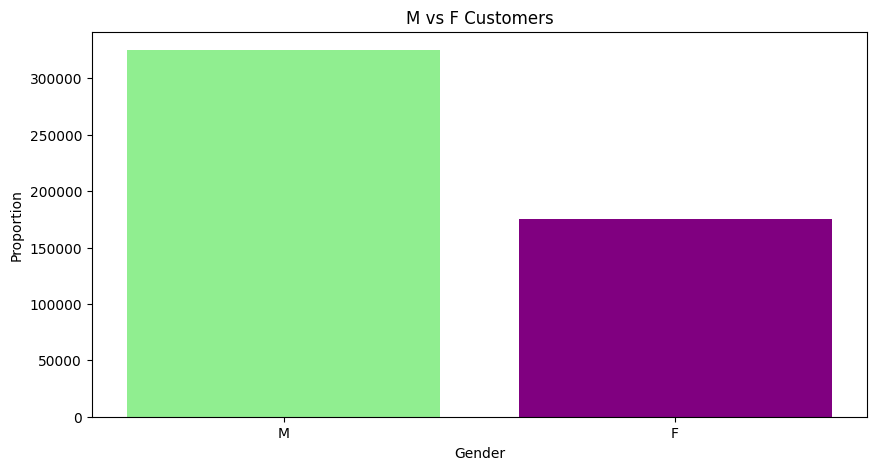

In [13]:
gender_counts = udf['Gender'].value_counts()
gender_props = gender_counts / gender_counts.sum()

plt.figure(figsize=(10, 5))
plt.bar(gender_counts.index, gender_counts.values, color=['lightgreen', 'purple'])
plt.title('M vs F Customers')
plt.xlabel('Gender')
plt.ylabel('Proportion')

plt.show()

There are roughly twice as many male customers as there are female customers.

### Customer Type

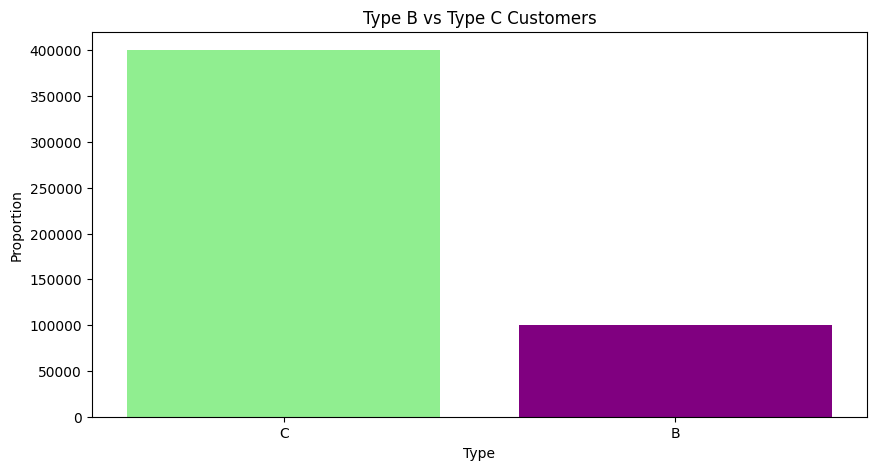

In [14]:
type_counts = udf['Type'].value_counts()
type_props = type_counts / type_counts.sum()

plt.figure(figsize=(10, 5))
plt.bar(type_counts.index, type_counts.values, color=['lightgreen', 'purple'])
plt.title('Type B vs Type C Customers')
plt.xlabel('Type')
plt.ylabel('Proportion')

plt.show()

There are 4 times as many Type C customers as there are Type B customers!

### Age

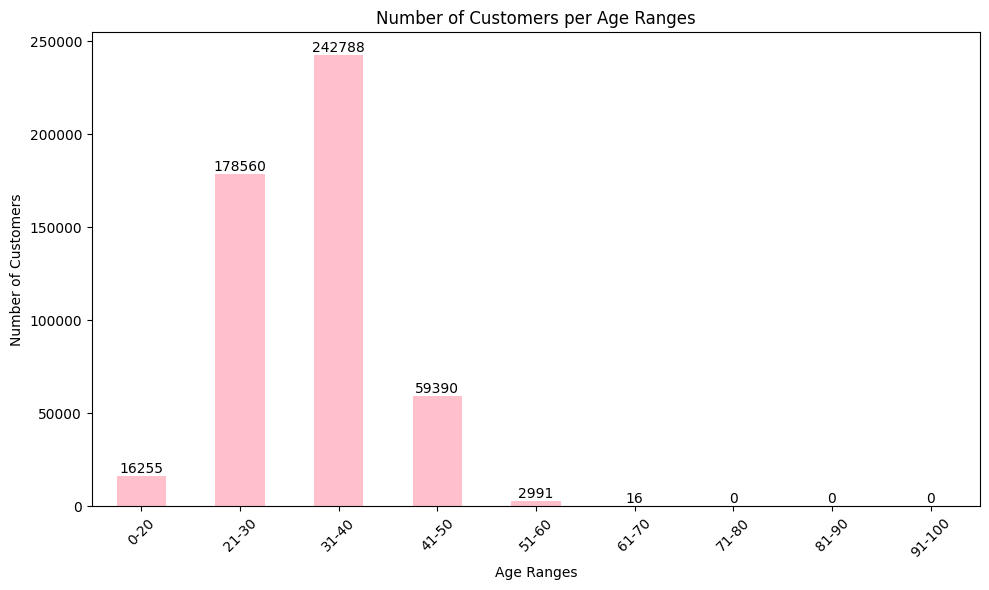

In [22]:
# Distribution of User Ages

# Define bins
age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Bin customers according to ages
udf['Age_Range'] = pd.cut(udf['Age'], bins=age_bins, labels=age_labels, right=False)
age_range_counts = udf['Age_Range'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
age_range_counts.plot(kind='bar', color='pink')
plt.title('Number of Customers per Age Ranges')
plt.xlabel('Age Ranges')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Annotate each bar with its count
for i, count in enumerate(age_range_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

All the customers are binned into age ranges up to 70 years old, so there is no need to include further ages in the states. There can be 6 bins for age, matching the bars shown above.

### Tenure

The total range for customer tenure in this dataset is from 0 to 38 months. The first, second, and third quartiles are at 11, 14, and 22. Thus, the bins for tenure will be set accordingly. 

(array([0, 1, 2, 3]),
 [Text(0, 0, '0-11'),
  Text(1, 0, '12-14'),
  Text(2, 0, '15-22'),
  Text(3, 0, '22-38')])

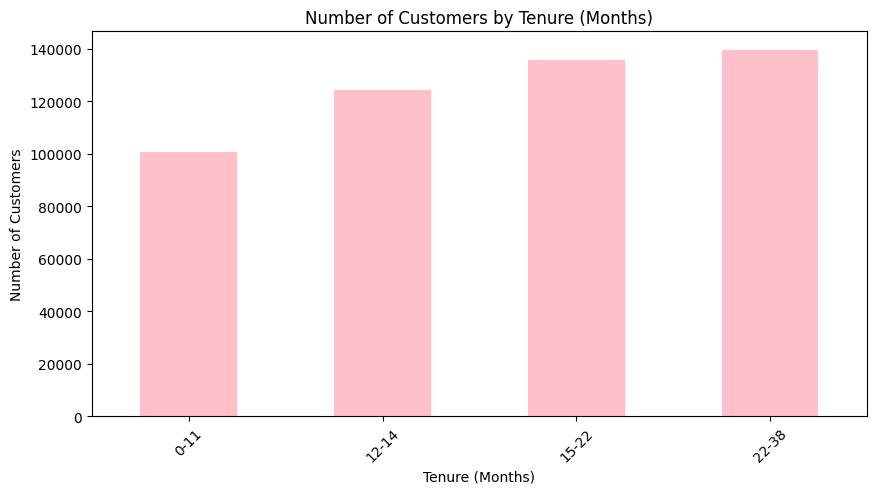

In [23]:
# distribution of customer tenure

# Define bins
tenure_bins = [0, 11, 14, 22, 38]
tenure_labels = ['0-11', '12-14', '15-22', '22-38']

# Bin the customers
udf['Tenure_Bin'] = pd.cut(udf['Tenure'], bins=tenure_bins, labels=tenure_labels, right=False)
bin_counts = udf['Tenure_Bin'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
bin_counts.plot(kind='bar', color='pink')
plt.title('Number of Customers by Tenure (Months)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

This is a very even split of the data, and I'm happy with that for my states.

## Sent Emails Data

This is the data showing which subject line was used to email each customer, for every sent email.

In [24]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476354 entries, 0 to 2476353
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Sent_Date       object
 1   Customer_ID     int64 
 2   SubjectLine_ID  int64 
dtypes: int64(2), object(1)
memory usage: 56.7+ MB


In [25]:
sdf.describe()

,Customer_ID,SubjectLine_ID
count,2.476354e+06,2.476354e+06
mean,2.498939e+05,1.999226e+00
std,1.443658e+05,8.166483e-01
min,1.000000e+00,1.000000e+00
25%,1.248830e+05,1.000000e+00
50%,2.498150e+05,2.000000e+00
75%,3.749980e+05,3.000000e+00
max,5.000000e+05,3.000000e+00


### Subject Line IDs

In [28]:
sdf.SubjectLine_ID.value_counts()

SubjectLine_ID
1    826717
2    824837
3    824800
Name: count, dtype: int64

The Subject Line ID is going to be the "Action" that the RL agent chooses. It looks like more emails were sent with Subject Line ID 1 and 2 than with 3. Perhaps 1 and 2 got better response rates than 3?

### How many emails sent per month?

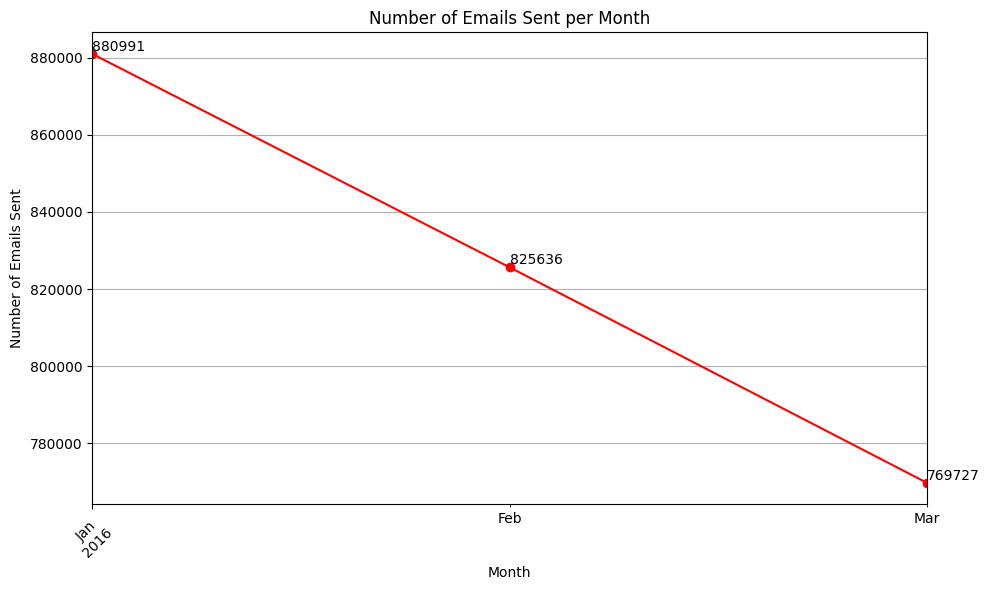

In [32]:
# Convert 'Sent_Date' to datetime object
sdf['Sent_Date'] = pd.to_datetime(sdf['Sent_Date'])

# Extract month
sdf['Sent_Month'] = sdf['Sent_Date'].dt.to_period('M')

# Group by month and count
monthly_email_counts = sdf.groupby('Sent_Month').size()

plt.figure(figsize=(10, 6))
monthly_email_counts.plot(kind='line', marker='o', color='r', linestyle='-')
# monthly_email_counts.plot(kind='bar', color='pink')
plt.title('Number of Emails Sent per Month')
plt.xlabel('Month')
plt.ylabel('Number of Emails Sent')
plt.xticks(rotation=45)
plt.grid(True)

# Annotate each data point
for month, count in monthly_email_counts.items():
    plt.text(month, count, str(count), ha='left', va='bottom')

plt.tight_layout()
plt.show()

The number of emails sent went down considerably from January to February, and then again from February to March. 

### Top Emailed Customers

In [42]:
# Group by 'Customer_ID' and count the number of emails sent per customer
emails_per_customer = sdf.groupby('Customer_ID').size()

# Sort the results in descending order
emails_per_customer_sorted = emails_per_customer.sort_values(ascending=False)
emails_per_customer_10_or_more = emails_per_customer[emails_per_customer >= 10]

print("\nNumber of Customers with 10 or More Emails Sent:")
print(len(emails_per_customer_10_or_more))

freq_emailed_prop = (len(emails_per_customer_10_or_more) / sdf.shape[0])*100
print("\nProportion of Customers with 10 or More Emails Sent:")
print(f'{freq_emailed_prop: .2f} %')

print("\nMax Number of Emails Sent to a Customer:")
print(max(emails_per_customer_sorted))


Number of Customers with 10 or More Emails Sent:
14656

Proportion of Customers with 10 or More Emails Sent:
 0.59 %

Max Number of Emails Sent to a Customer:
20


## Responded Data

In [43]:
rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378208 entries, 0 to 378207
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Responded_Date  378208 non-null  object
 1   Customer_ID     378208 non-null  int64 
 2   SubjectLine_ID  378208 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.7+ MB


In [44]:
rdf.describe()

,Customer_ID,SubjectLine_ID
count,378208.000000,378208.000000
mean,250107.676583,1.960749
std,144299.401942,0.808531
min,1.000000,1.000000
25%,125161.250000,1.000000
50%,250325.500000,2.000000
75%,375056.500000,3.000000
max,500000.000000,3.000000


### Distribution of Responses over Time

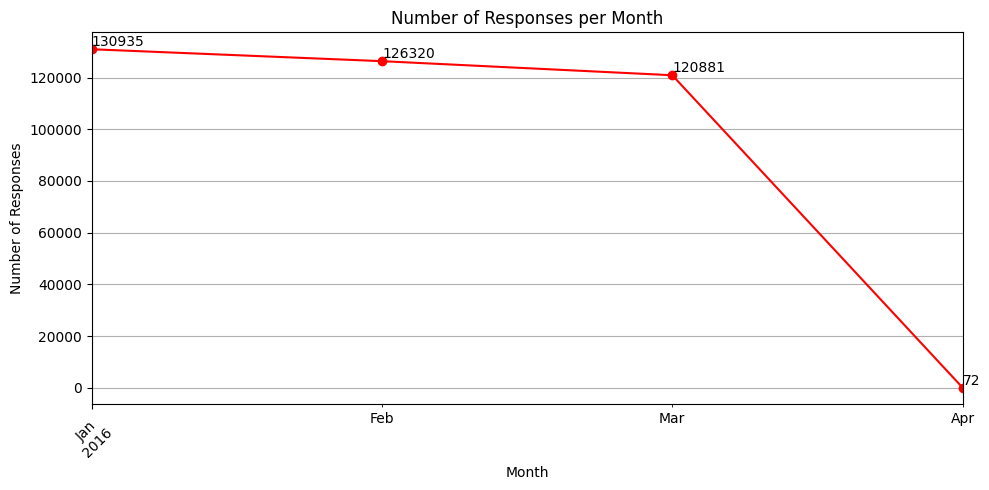

In [46]:
rdf['Responded_Date'] = pd.to_datetime(rdf['Responded_Date'])
# Extract the month
rdf['Responded_Month'] = rdf['Responded_Date'].dt.to_period('M')

# Group by month and count the number of responses
monthly_response_counts = rdf.groupby('Responded_Month').size()

plt.figure(figsize=(10, 5))
monthly_response_counts.plot(kind='line', marker='o', color='r', linestyle='-')
plt.title('Number of Responses per Month')
plt.xlabel('Month')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.grid(True)

for month, count in monthly_response_counts.items():
    plt.text(month, count, str(count), ha='left', va='bottom')

plt.tight_layout()
plt.show()

Interesting to note that while all the emails were sent between Jan 2016 to Mar 2016, there were a few responses in Apr 2016.

### Frequency of Subject Line IDs of Responded Emails

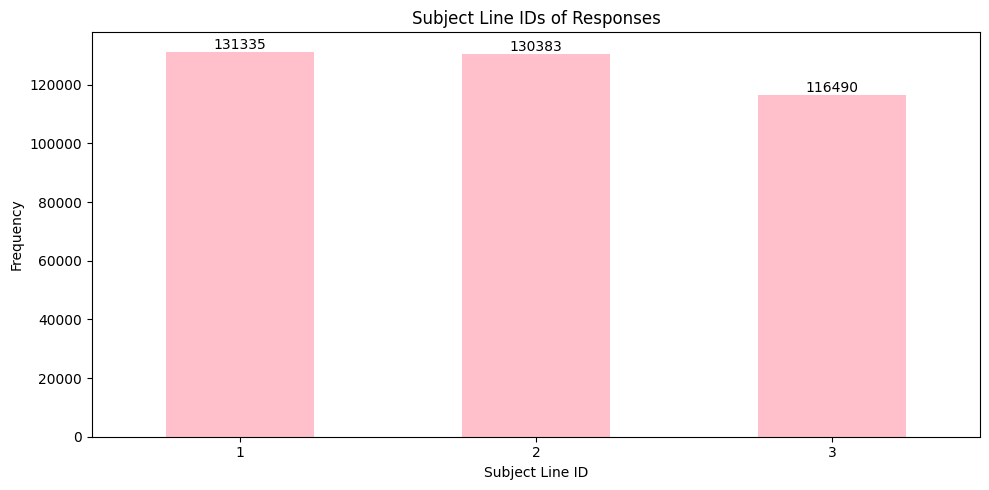

In [52]:
subject_line_counts = rdf['SubjectLine_ID'].value_counts()

plt.figure(figsize=(10, 5))
subject_line_counts.plot(kind='bar', color='pink')
plt.title('Subject Line IDs of Responses')
plt.xlabel('Subject Line ID')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

# Annotate each bar
for i, count in enumerate(subject_line_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

Subject Lines 1 and 2 are fairly similar in conversion rate, but Subject Line 3 seems to not be getting quite as many responses as the other two.

### Customer IDs vs Sent Emails vs Responses

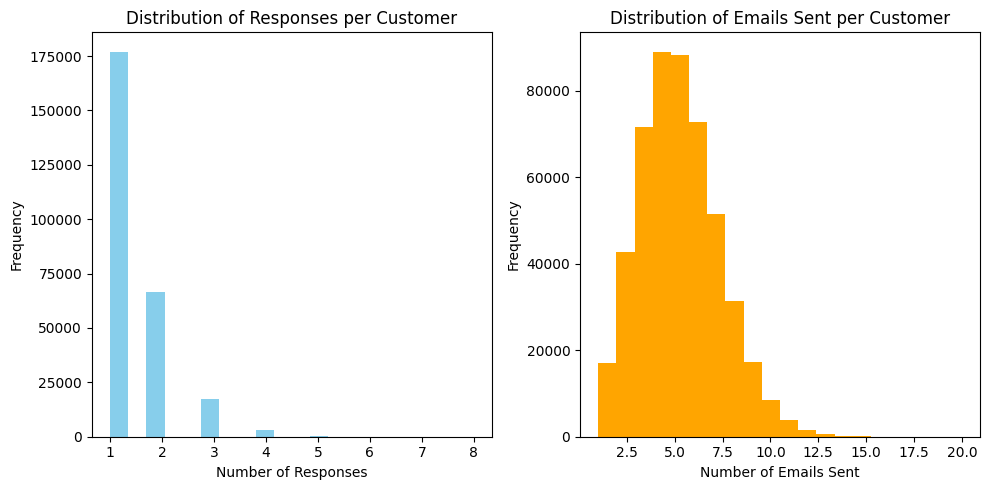

In [53]:
customer_response_counts = rdf['Customer_ID'].value_counts()
customer_email_counts = sdf['Customer_ID'].value_counts()

plt.figure(figsize=(10, 5))

# Plot distribution of responses
plt.subplot(1, 2, 1)
customer_response_counts.plot(kind='hist', bins=20, color='skyblue')
plt.title('Distribution of Responses per Customer')
plt.xlabel('Number of Responses')
plt.ylabel('Frequency')

# Plot distribution of emails sent
plt.subplot(1, 2, 2)
customer_email_counts.plot(kind='hist', bins=20, color='orange')
plt.title('Distribution of Emails Sent per Customer')
plt.xlabel('Number of Emails Sent')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

This is interesting because these plots show that while on average ~5 emails are sent per customer, the number of responses we can expect per customer is only 1-2 emails. 

### Customer Age and Tenure vs Number of Responses

In [54]:
total_df = pd.merge(rdf, udf, on ='Customer_ID', how ='left')
customer_response_counts = total_df['Customer_ID'].value_counts()

C:\Users\shak-\AppData\Local\Temp\ipykernel_34048\3406949670.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_range_responses = total_df.groupby('Age_Range')['Customer_ID'].count()


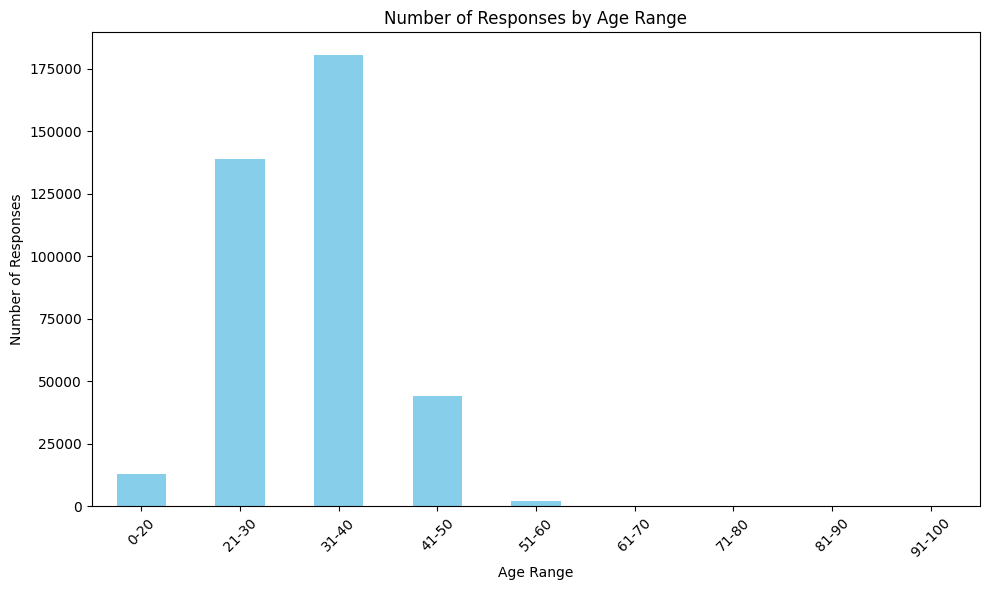

In [59]:
age_range_responses = total_df.groupby('Age_Range')['Customer_ID'].count()

# Age vs Responses
plt.figure(figsize=(10, 6))

age_range_responses.plot(kind='bar', color='skyblue')
plt.title('Number of Responses by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\shak-\AppData\Local\Temp\ipykernel_34048\2768838530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_bin_responses = total_df.groupby('Tenure_Bin')['Customer_ID'].count()


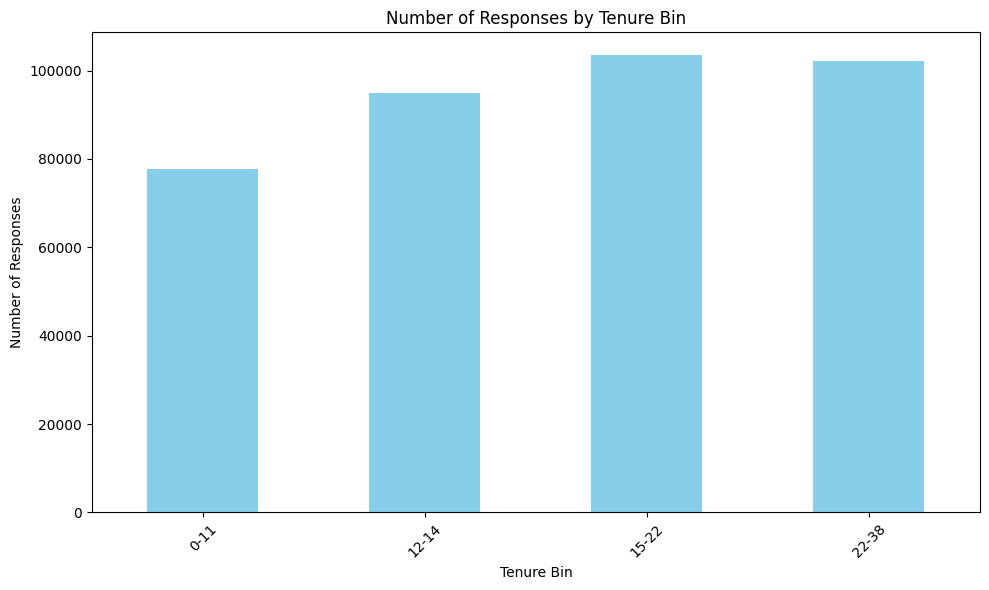

In [60]:
tenure_bin_responses = total_df.groupby('Tenure_Bin')['Customer_ID'].count()

# Tenure vs Responses
plt.figure(figsize=(10, 6))

tenure_bin_responses.plot(kind='bar', color='skyblue')
plt.title('Number of Responses by Tenure Bin')
plt.xlabel('Tenure Bin')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()